In [1]:
import numpy as np
import skfmm
import matplotlib.pyplot as plt
import tifffile as tif
import cv2

In [2]:
pwd

'/home/hasitha/Desktop/fastmarching'

In [3]:
# read data
origin_data = np.loadtxt('topography.txt')
print('size of origin_data {:d}'.format(len(origin_data)))

size of origin_data 28600


(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7f6dadb94eb0>)

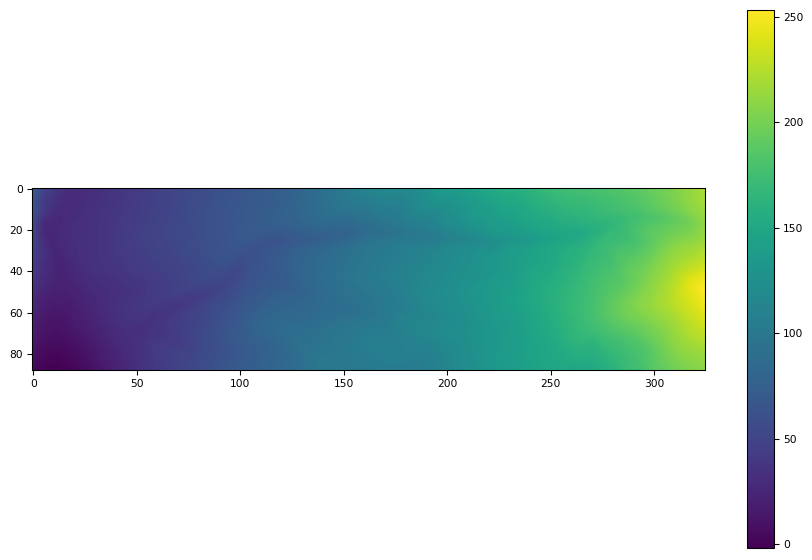

In [4]:
# 2d plot
origin_2d = np.zeros((88, 325))
for i in np.arange(88):
    for j in np.arange(325):
        idx = i * 325 + j
        origin_2d[i,j] = origin_data[:,2][idx]
tif.imshow(origin_2d)

part of original image size: (40, 125)


(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7f6dad296b50>)

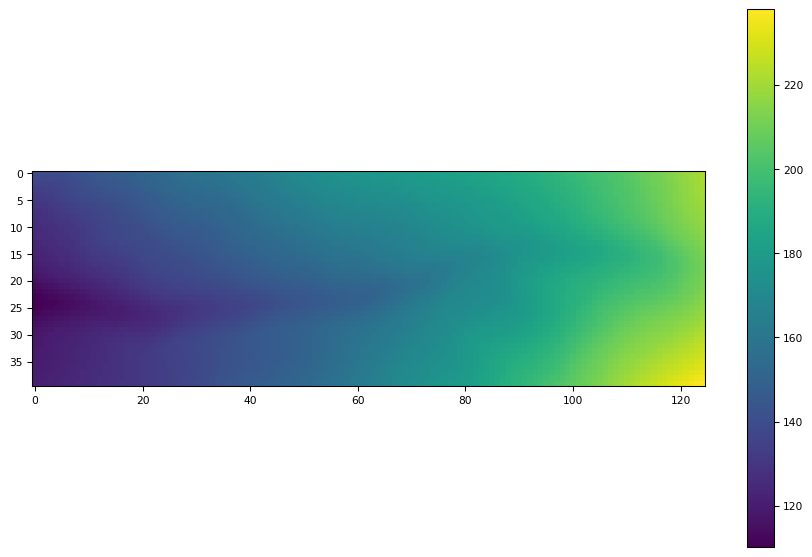

In [5]:
part_2d = origin_2d[:40, 200:].copy()
print('part of original image size: {}'.format(part_2d.shape))
tif.imshow(part_2d)

resized 2d image shape: (1280, 4000)


(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7f6dad242430>)

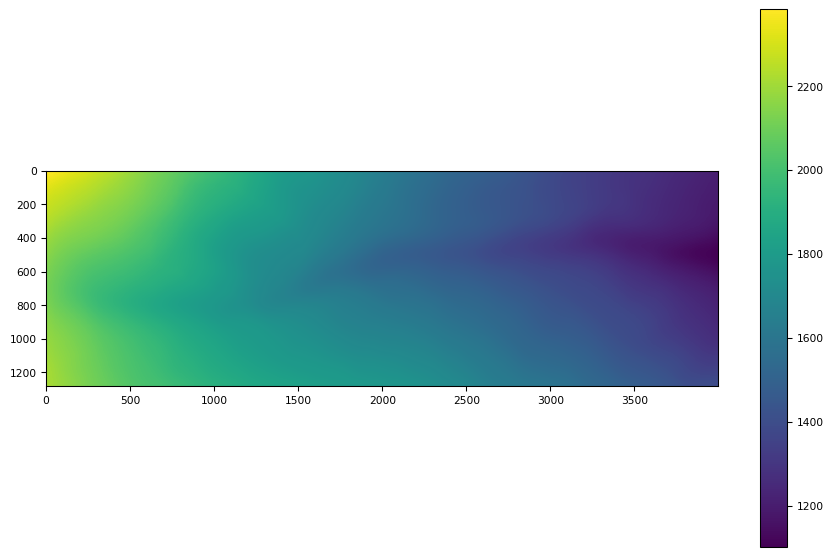

In [6]:
# convert to size (640, 2000)
resized_dim = (4000, 1280)
resized_2d = cv2.resize(part_2d, resized_dim, interpolation = cv2.INTER_CUBIC)
print('resized 2d image shape: {}'.format(resized_2d.shape))
# scale the height
resized_2d *= 10.
# mirror the image
resized_2d = resized_2d[::-1,::-1]
tif.imshow(resized_2d)

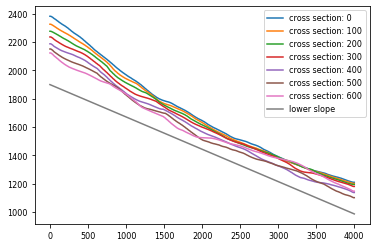

In [7]:
#visualize cross section:
for i in np.arange(7):
    plt.plot(np.arange(4000), resized_2d[100*i,:], label='cross section: {}'.format(100*i))
plt.plot(np.arange(4000), -400./1750.*np.arange(4000)+1900., label='lower slope')
plt.legend()

In [8]:
np.arctan(400/1750)

0.22471116841464267

(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7f6dad0d54f0>)

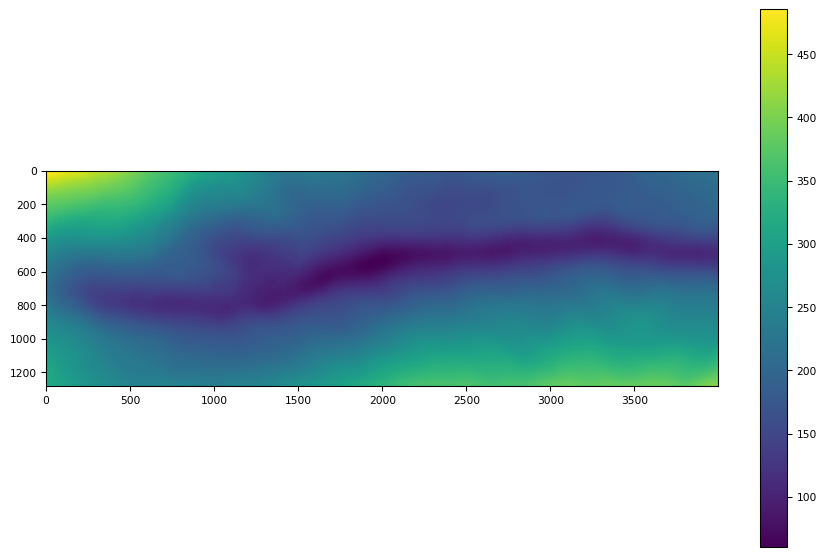

In [9]:
# flatten the image slope = 600./1750.
slope_2d = -400./1750.*np.arange(4000)+1900.
flatten_2d = resized_2d - slope_2d
tif.imshow(flatten_2d)

In [10]:
#define underlying grid
data_3d = np.ones((1280, 4000, 400), dtype = np.float32)
for i in np.arange(1280):
    for j in np.arange(4000):
        height = int(flatten_2d[i,j])
        data_3d[i,j,:height] = -1

(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7f6dace7b130>)

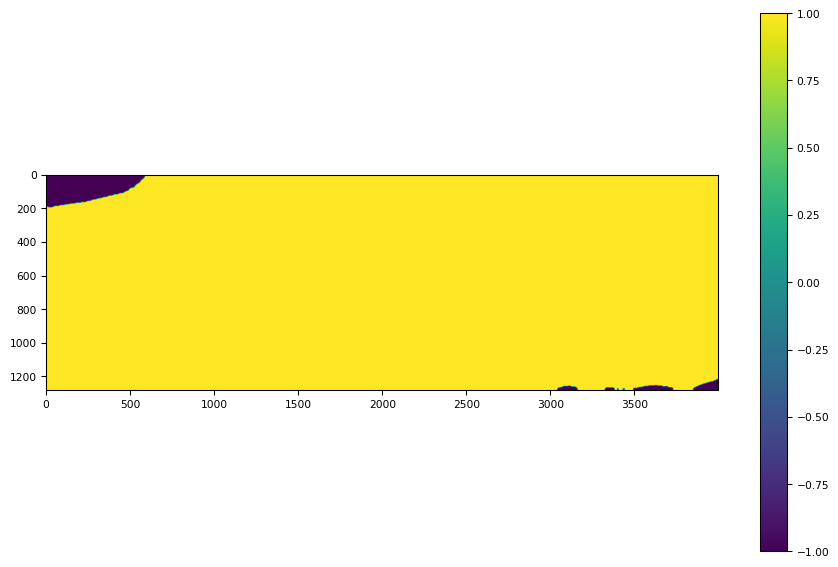

In [11]:
#visualize data_3d
tif.imshow(data_3d[:,:,380])

In [ ]:
# very expensive step
lset = skfmm.distance(data_3d, dx=1., narrow = 3.)

In [45]:
lset.shape

(640, 2000, 200)

In [46]:
#prepare 1d_array for lset
lset_1d = np.zeros(np.prod(lset.shape))

In [47]:
lset_1d.shape

(256000000,)

In [52]:
current = 0
for i in np.arange(200):
    for j in np.arange(640):
        lset_1d[current:current+2000] = lset[j,:,i]
        current += 2000

In [49]:
pwd

'/Users/tanpeng/Desktop/MPI_code/Triaxial_compression'

In [50]:
cd ../Impulse-based/

/Users/tanpeng/Desktop/MPI_code/Impulse-based


In [53]:
np.savetxt('levelset_topography_zoomin.dat', lset_1d, '%.4f')